Ch6 Régression

invention de Sir Francis Galton.

Permet de prédire une valeur à partir d'une ou plusieurs valeurs.

Elle étudie la relation entre les variables dépendantes et indépendantes.

Ch7 Régression linéaire simple

25 Le dataset

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
%matplotlib inline

In [115]:
df = pd.read_csv('iris/iris.csv')

In [116]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Normalement, ce dataset est employé pour faire de la classification, cependant nous allons l'employer ici pour déterminer la longueur des pétales en fonction d'autres variables.
La régression est l'outil désign pour la session.

La première étape de la procédure pour la régression correspond à vérifier l'existence ou non de relations linéaires entre les variables.

KeyboardInterrupt: 

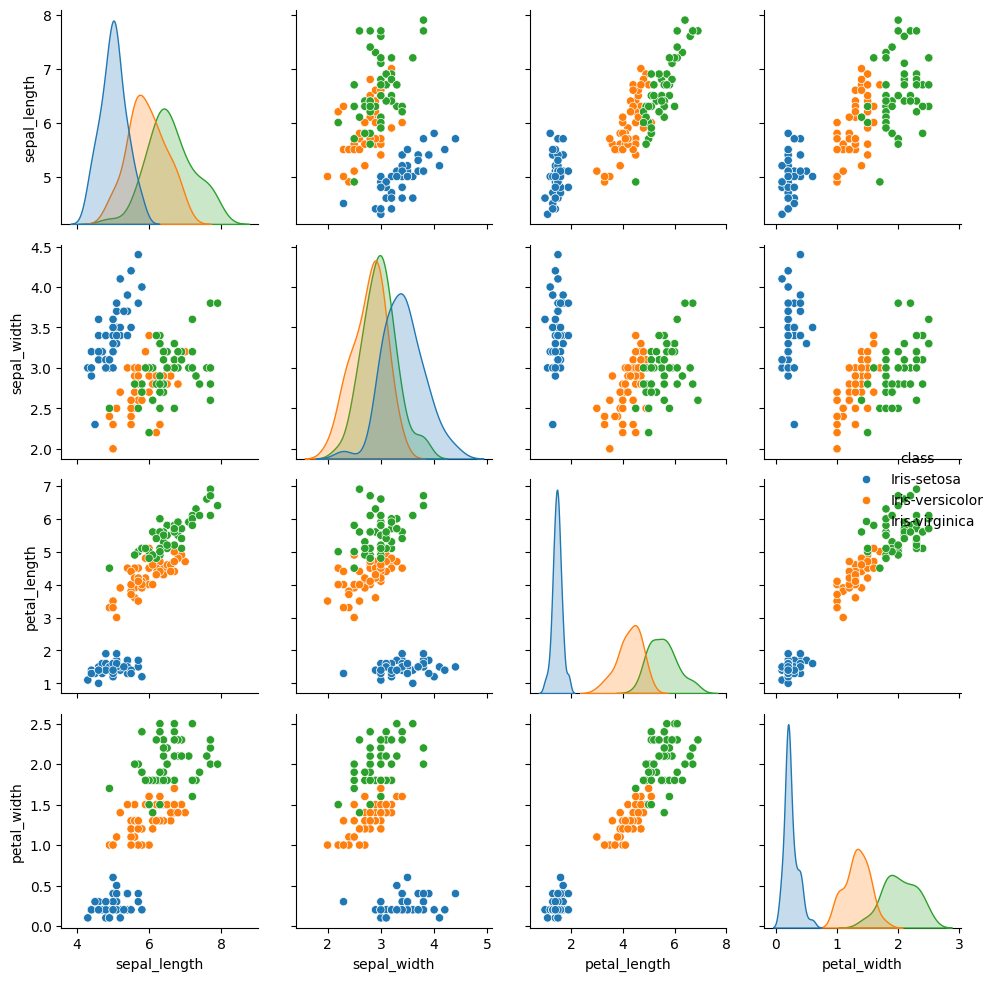

In [118]:
sns.pairplot(df, hue = "class")
plt.show()

Ils existe plusieurs relations linéaires dont certaines moins évidentes.
Par exemple sepal_length et petal_length qui sans la classe setosa présent une relation linéaire nette.

Ici nous voyons que quelque soit l'espèce, il existe une corrélation forte et positive entre la longueur et la largeur des pétales quelque soit leur espèce

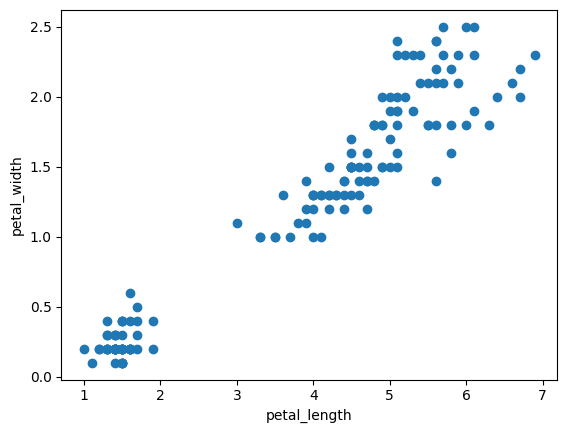

In [36]:
plt.plot(df["petal_length"], df["petal_width"], 'o')
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

26 Equation de droite

Mathématiques
y = a * x + b

a: pente/slope
b: valeur à l'ordonnée/y-intercept

Machine learning

y = b + w * x

w: coefficient de pondération/weight
b: biais 


Le but de la régression linéaire est d'à partir de données d'écrire un algorithme permettant de déterminer la valeur de b et w pour tracer la droit présentant au mieux les données souhaitées.

27 Implémentation: équation de droite

In [34]:
w= -5 
b = 10
#11 valeurs entières entre 0 et 10
x = np.linspace(0, 10, 11)

y = b + w * x
y

array([ 10.,   5.,   0.,  -5., -10., -15., -20., -25., -30., -35., -40.])

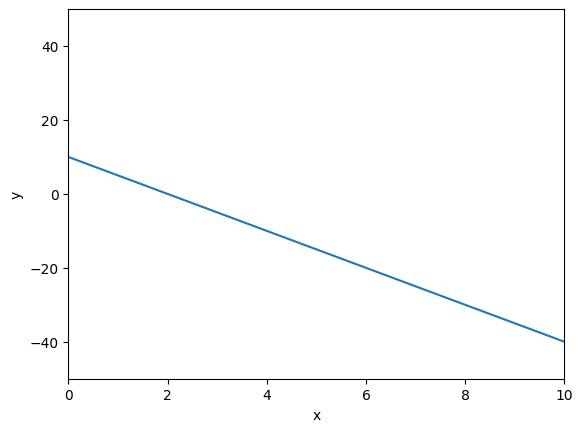

In [35]:
#matplotlib ajuste automatiquement les valeurs des abscisses et des ordonnées
#Ici gca(get current axes) définie la valeur des axes et set_x/ylim les restreint.
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([-50,50])
plt.show()

28 Droite optimale

In [38]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Nous allons ici nous focaliser sur la relation entre la largeur et la longeur des pétales.

In [42]:
df1 = df.drop(['sepal_length', 'sepal_width'], axis = 1)

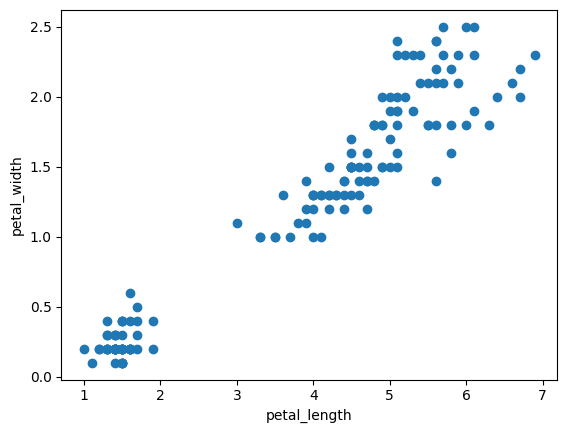

In [50]:
plt.plot(df1['petal_length'], df1['petal_width'], "o")
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

Voici une approximation d'une droite de régression réalisée graphiquement en modifiant les paramètres manuellement.

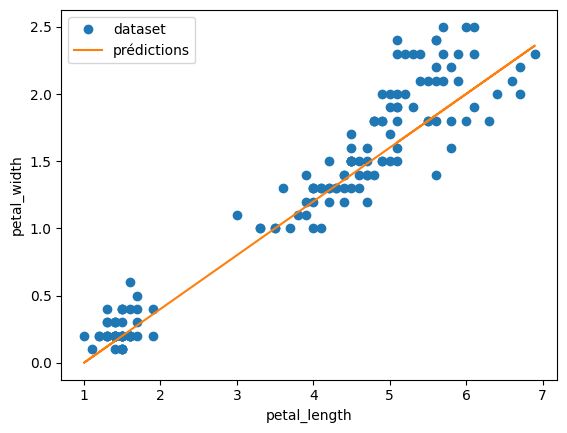

In [62]:
w = 0.4
b = -0.4
x = df1['petal_length']
y =b + w*x

plt.plot(df1['petal_length'], df1['petal_width'], "o", label = 'dataset')
plt.plot(x, y, label = 'prédictions')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

plt.show()

Grâce aux paramètres déterminés, nous pouvons approximer la largeur d'une pétale pour une longueur donnée (ici 5)

In [64]:
y_foretold = b + w * 5
y_foretold

1.6

30 Coefficients optimaux

La solution a l'équation

y = b + w * x

est 

b = ym - w * xm 

où ym et xm sont les moyennes respectives d'y et x

et w calculé par

[S(xi-xm)(yi-ym)]/S(xi-xm)²

31 Implémentation

Afin d'exercer des fonction mathématiques sur des vecteurs ou matrices, les convertir en numpy est la meilleure pratique.

La méthode values est ici employée à cet effet.

In [67]:
l_petale = df1['petal_length'].values
w_petale = df1['petal_width'].values

In [68]:
type(l_petale)

numpy.ndarray

In [ ]:
df1.count()

Calcule des moyennes

In [80]:
xm = 0
ym = 0
tot = 150
for xi, yi in zip(l_petale, w_petale):
    xm += xi
    ym += yi

xm = xm/tot
ym = ym/tot

In [81]:
xm

np.float64(3.7586666666666693)

In [82]:
ym

np.float64(1.1986666666666672)

Calcul de w

In [91]:
w_num = 0
w_den = 0

for xi, yi in zip(l_petale, w_petale):
   w_num += (xi-xm)*(yi-ym)
   w_den += (xi-xm)**2

In [94]:
w = w_num/w_den

Origine de la droite et solution de l'équation 

In [95]:
b = ym - xm * w

In [96]:
b

np.float64(-0.36651404521673014)

32 Implémentation: Partie 2: coefficient optimaux

Nous allons désormais tracer la droit optimale à partir des coefficients précédément calculés

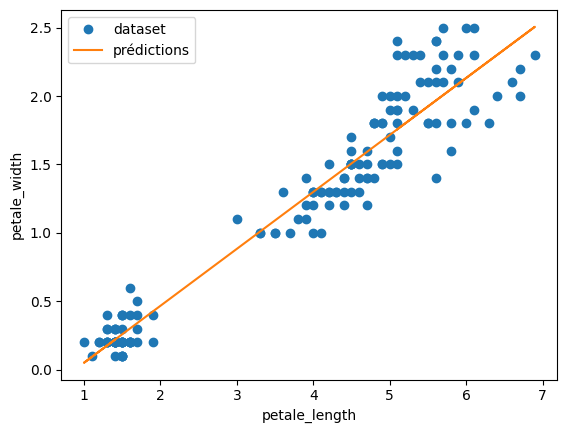

In [103]:
y = b + w * l_petale

plt.plot(l_petale, w_petale, 'o', label = 'dataset')
plt.plot(l_petale, y, label = 'prédictions')
plt.xlabel('petale_length')
plt.ylabel('petale_width')
plt.legend()
plt.show()

Nous pouvon désormais créer des prédictions
ex pour  une pétale de 5 cm

In [105]:
y_5 = b + w * 5
y_5

np.float64(1.715581616210278)

33 Comprendre la solution optimale


La droite optimale s'appelle ainsi car elle optimise l'erreur moyenne quadratique  (MSE).


Elle est la droite qui offre le plus court chemin de rencontre total avec tous les points d'un espace(dataset).

droite optimale:
y_estimé = b + w * x

MSE = (yi - y_estimé)²/N 
Pour i allant de 1 à N

34 Implémentation scikit-learn

sklearn ne peut traiter que des vecteurs.

Cependant l_petale et w_petale n'ent sont pas car 
de dimension (150,) (tout en une ligne) or nous voulons une dimension soit
(150,1) (points en une colonne).

In [108]:
l_petale.shape

(150,)

Pour palier à ce problème, nous allons employer la fonction reshape de numpy

In [112]:
#Ici -1 signifie "Nombre de lignes initial' et 1, une colonne
X = l_petale.reshape(-1,1)
Y = w_petale.reshape(-1,1)

In [113]:
X

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

Ceci fait, la prochaine étape de calculer les coefficients optimaux

In [121]:
#Algorithme
modele = linear_model.LinearRegression()
#Input
modele.fit(X,Y)

#coefficients optimaux
w = modele.coef_
b = modele.intercept_
print(w, b)

[[0.41641913]] [-0.36651405]


Nous pouvons désormais comparer les prédictions du modèle au dataset

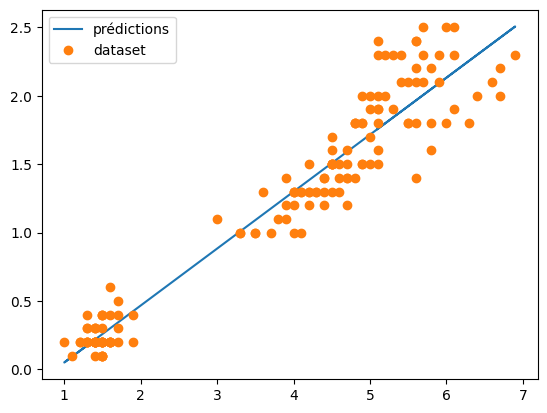

In [127]:
Y_pred = modele.predict
plt.plot(X, Y_pred(X), label = 'prédictions')
plt.plot(X, Y, 'o', label = 'dataset')

plt.xlabel = 'lenght_petale'
plt.ylabel = 'width_petale'
plt.legend()

plt.show()

Nous pouvons essayer avec d'autres valeurs

In [129]:
#La syntaxe [[4]] convertie 4 en vecteur 
Y_pred([[4], [3]])

array([[1.29916248],
       [0.88274335]])

L'un des évaluateur du modèle est sa MSE.

In [133]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(Y_pred(X), Y)
MSE

np.float64(0.04228994631948424)